In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob

%matplotlib inline

In [9]:
team_dict = {
    1: 'Arsenal',
    2: 'Bournemouth',
    3: 'Brighton',
    4: 'Burnley',
    5: 'Cardiff',
    6: 'Chealsea',
    7: 'Crystal Palace',
    8: 'Everton',
    9: 'Fulham',
    10: 'Huddersfield Town',
    11: 'Leicester City',
    12: 'Liverpool',
    13: 'Manchester City',
    14: 'Manchester United',
    15: 'Newcastle United',
    16: 'Southampton',
    17: 'Tottenham Hotspur',
    18: 'Watford',
    19: 'West Ham United',
    20: 'Wolverhampton',
    
}

In [10]:
dfp = pd.read_csv('./data/2018-19/cleaned_players.csv')

In [11]:
dfpr = pd.read_csv('./data/2018-19/players_raw.csv')
dfpr['team_name'] = dfpr.apply(lambda x: team_dict[x.team], axis=1)

In [12]:
cols = [
    'id',
    'first_name',
    'second_name',
    'team',
    'team_name'
]
df_players = dfpr[cols]

In [16]:
cols = [
    'id',
    'team',
    'team_code',
    'first_name',
    'second_name',
    'total_points',
    'code',
    'team_name',
]
dfpr[cols].sort_values('total_points', ascending=False)

,id,team,team_code,first_name,second_name,total_points,code,team_name
142,122,6,8,Eden,Hazard,75,42786,Chealsea
135,115,6,8,Marcos,Alonso,72,82263,Chealsea
318,253,12,14,Mohamed,Salah,65,118748,Liverpool
45,43,2,91,Callum,Wilson,63,75115,Bournemouth
21,23,1,3,Pierre-Emerick,Aubameyang,63,54694,Arsenal
316,251,12,14,Sadio,Mané,63,110979,Liverpool
42,40,2,91,Ryan,Fraser,62,90105,Bournemouth
349,280,13,43,Sergio,Agüero,60,37572,Manchester City
312,247,12,14,Andrew,Robertson,57,122798,Liverpool
329,260,13,43,Ederson,Santana de Moraes,57,121160,Manchester City


Text(0.5,1,'FPL Total Points Distribution')

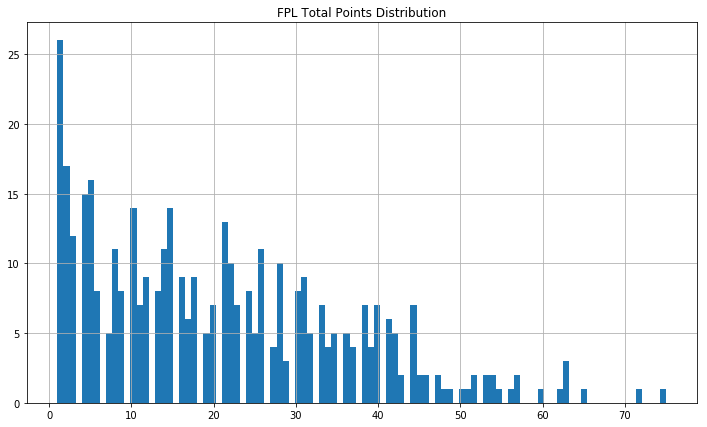

In [23]:
plt.figure(figsize=(12,7))
ax = dfpr.query('total_points > 0').total_points.hist(bins=100)
ax.set_title('FPL Total Points Distribution')

In [ ]:
dfpr.query('team == 20')[cols]

In [ ]:
cols = [
    'id',
    'first_name',
    'second_name',
    'total_points',
    'team',
    'now_cost',
    'team_name'
]
dfpr.sort_values(['total_points'], ascending=[False])[cols]

In [33]:
dfh = pd.read_csv('./data/2018-19/players/Ross_Barkley_127/gw.csv')

In [75]:
dfh[['total_points', 'value']]

,total_points,value
0,3,60
1,1,60
2,1,60
3,0,59
4,1,58
5,1,58
6,1,58
7,13,57
8,6,57
9,17,57


In [31]:
dfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 54 columns):
assists                            10 non-null int64
attempted_passes                   10 non-null int64
big_chances_created                10 non-null int64
big_chances_missed                 10 non-null int64
bonus                              10 non-null int64
bps                                10 non-null int64
clean_sheets                       10 non-null int64
clearances_blocks_interceptions    10 non-null int64
completed_passes                   10 non-null int64
creativity                         10 non-null float64
dribbles                           10 non-null int64
ea_index                           10 non-null int64
element                            10 non-null int64
errors_leading_to_goal             10 non-null int64
errors_leading_to_goal_attempt     10 non-null int64
fixture                            10 non-null int64
fouls                              10 non-null i

In [ ]:
dfh['opponent_team_name'] = dfh.apply(lambda x: team_dict[x.opponent_team], axis=1)

In [ ]:
cols = [
    'total_points',
    'opponent_team',
    'opponent_team_name',
]
dfh[cols]

In [ ]:
dfh.total_points.plot(kind='bar')

In [ ]:
dfpr.info()

In [ ]:
dfpr.groupby('team_name').sum()[['total_points', 'now_cost']].sort_values('now_cost')

In [ ]:
dfw = pd.read_csv('./data/2018-19/gws/gw1.csv', encoding="ISO-8859-1")

In [ ]:
dfw.info()

In [ ]:
dfpr.query('id == 14')[['first_name', 'second_name']]

In [ ]:
dfw.shape

In [ ]:
dfw = pd.merge(dfw, df_players, how='left', on='id')

In [ ]:
dfw['opponent_team_name'] = dfw.apply(lambda x: team_dict[x.opponent_team], axis=1)

In [ ]:
dfw.info()

In [ ]:
dfw[['name', 'id', 'team_name', 'opponent_team_name', 'total_points', 'goals_scored']].sort_values('total_points', ascending=False)

In [ ]:
dfw.info()

In [ ]:
dfw.groupby('team_name').sum()[['total_points', 'goals_scored']].sort_values('total_points', ascending=False)

In [ ]:
dfw['is_home'] = dfw['was_home'] == False

In [ ]:
dfw.groupby('team_name').head(1)[['team_a_score', 'team_h_score', 'team_name', 'opponent_team_name', 'was_home',]]

In [ ]:
df_players

# Find player last 3 games score

In [38]:
files = glob('./data/2018-19/players/*')

In [79]:
data = []
for f in files:
    player = f.split('/')[4]
    file = "{}/gw.csv".format(f)
    df = pd.read_csv(file)
    
    df_last3 = df.iloc[-3:]
    point = df['total_points'].sum()
    point_3_game = df_last3['total_points'].sum()
    point_median = df_last3['total_points'].median()
    point_mean = df_last3['total_points'].median()
    
    price = df.iloc[-1]['value']
    
    data.append({'player': player, 'point_last_3_game': point_3_game, 'point_median': point_median, 'point_mean': point_mean, 'point': point, 'price': price/10})
    
    #break

In [80]:
df_form = pd.DataFrame(data)

In [81]:
df_form.sort_values(['point_last_3_game'], ascending=False).head(50)

,player,point,point_last_3_game,point_mean,point_median,price
254,Anthony_Martial_301,41,37,13.0,13.0,7.3
154,Ross_Barkley_127,44,36,13.0,13.0,5.7
344,Pierre-Emerick_Aubameyang_23,63,35,12.0,12.0,10.8
442,Mathew_Ryan_47,45,30,10.0,10.0,4.5
129,Callum_Wilson_43,63,28,13.0,13.0,6.5
406,Jordan_Pickford_154,46,28,11.0,11.0,4.9
222,Mohamed_Salah_253,65,26,8.0,8.0,12.9
481,Bruno_Saltor Grau_50,26,25,7.0,7.0,4.4
50,Antonio_Rüdiger_118,51,23,6.0,6.0,5.9
528,Riyad_Mahrez_223,41,22,10.0,10.0,8.6


In [51]:
df.iloc[-3:]['total_points'].sum()

0

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 54 columns):
assists                            10 non-null int64
attempted_passes                   10 non-null int64
big_chances_created                10 non-null int64
big_chances_missed                 10 non-null int64
bonus                              10 non-null int64
bps                                10 non-null int64
clean_sheets                       10 non-null int64
clearances_blocks_interceptions    10 non-null int64
completed_passes                   10 non-null int64
creativity                         10 non-null float64
dribbles                           10 non-null int64
ea_index                           10 non-null int64
element                            10 non-null int64
errors_leading_to_goal             10 non-null int64
errors_leading_to_goal_attempt     10 non-null int64
fixture                            10 non-null int64
fouls                              10 non-null i

In [72]:
df[['value']]

,value
0,45
1,45
2,45
3,44
4,44
5,44
6,44
7,44
8,44
9,44


In [74]:
dfh[['value']]

,value
0,60
1,60
2,60
3,59
4,58
5,58
6,58
7,57
8,57
9,57
